In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv("Cleaned_Wildland_Fires.csv")

## Dependability of Wind Speed and size of Wildland-Fire

In [3]:
d = df.copy()

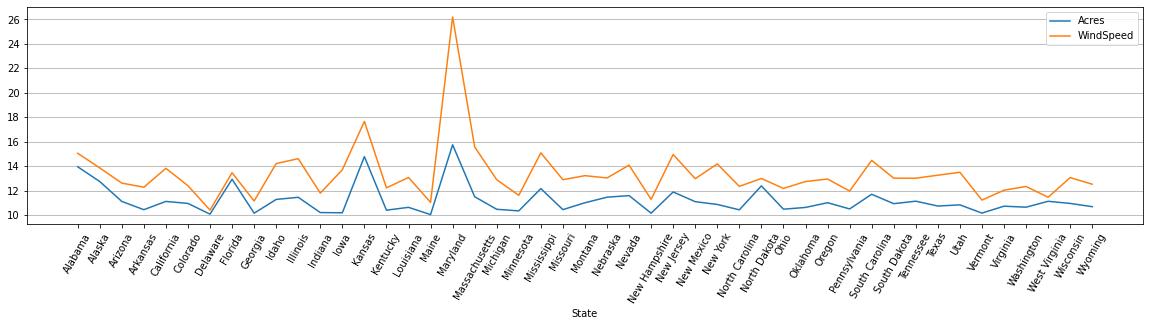

In [4]:
scaler = MinMaxScaler(feature_range=(10, max(df.WindSpeed)))
d.Acres = scaler.fit_transform(d[["Acres"]])
temp = d.groupby(['State']).mean()[['Acres','WindSpeed']].plot(figsize=(20, 4))
temp.set_xticks(range(len(d.State.unique())));
temp.set_xticklabels([item for item in sorted(d.State.unique())], rotation=60);
temp.grid(axis='y')

## Dependability of Fire Cause and its Duration

In [5]:
d = df.copy()

<AxesSubplot:title={'center':'Fire Cause Distribution'}>

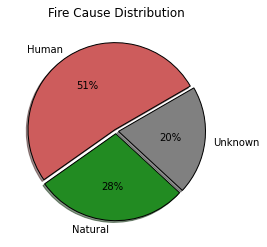

In [6]:
d.FireCause.str.get_dummies().value_counts().plot.pie(
label="",
shadow=True,
startangle=30,
autopct='%1.0f%%',
explode=(0.02, 0.03, 0.03),
title = "Fire Cause Distribution",
labels=df.FireCause.value_counts().index,
colors = ['indianred', 'forestgreen', 'grey'],
wedgeprops = {"edgecolor" : "black",
              'linewidth': 1,
              'antialiased': True})

<AxesSubplot:title={'center':'Duration of Fire by Cause'}, xlabel='FireCause', ylabel='Days'>

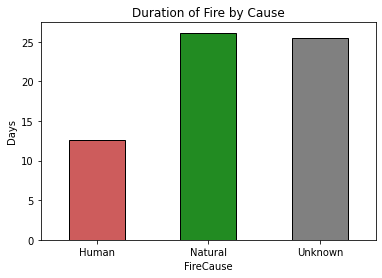

In [7]:
d.groupby(['FireCause']).mean()['Duration'].plot(
    kind = "bar", 
    color=['indianred', 'forestgreen', 'grey'],
    edgecolor = ['black', 'black', 'black'],
    title="Duration of Fire by Cause",
    rot = 0,
    ylabel = "Days")

## Prespective of amount of fires in California and all other States

<AxesSubplot:title={'center':'Amount of Wildfires Distribution'}>

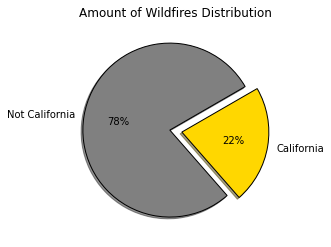

In [10]:
df_state = pd.read_csv("Full_Wildland_Fires.csv")['POOState'].copy()
df_state.loc[df_state != "US-CA"] = "Not California"
df_state.loc[df_state == "US-CA"] = "California"

df_state.str.get_dummies().value_counts().plot.pie(
label="",
shadow=True,
startangle=30,
autopct='%1.0f%%',
explode=(0.07, 0.07),
title = "Amount of Wildfires Distribution",
labels=df_state.value_counts().index,
colors = ['gray', 'gold'],
wedgeprops = {"edgecolor" : "black",
              'linewidth': 1,
              'antialiased': True})

## Location of fires with temperature

The below implementation creates and interactive map with the fire locations and their temperature, since it makes the notebook lag, the cell below it shows the map as an image.

In [17]:
d = df.copy()
d = d[["Lat", "Long", "MaxTemp"]]
fig = px.scatter_geo(d,
                     lat='Lat',lon='Long', 
                     hover_data=['MaxTemp'], 
                     color=df['MaxTemp'])
fig.update_layout(title = 'Map of US Wildland Fires', 
                  title_x=0.5,
                  geo_scope='usa',
                  coloraxis_colorbar=dict(title="Tempreture on day 1"))
fig.update_traces(marker=dict(size=3))
fig.show()

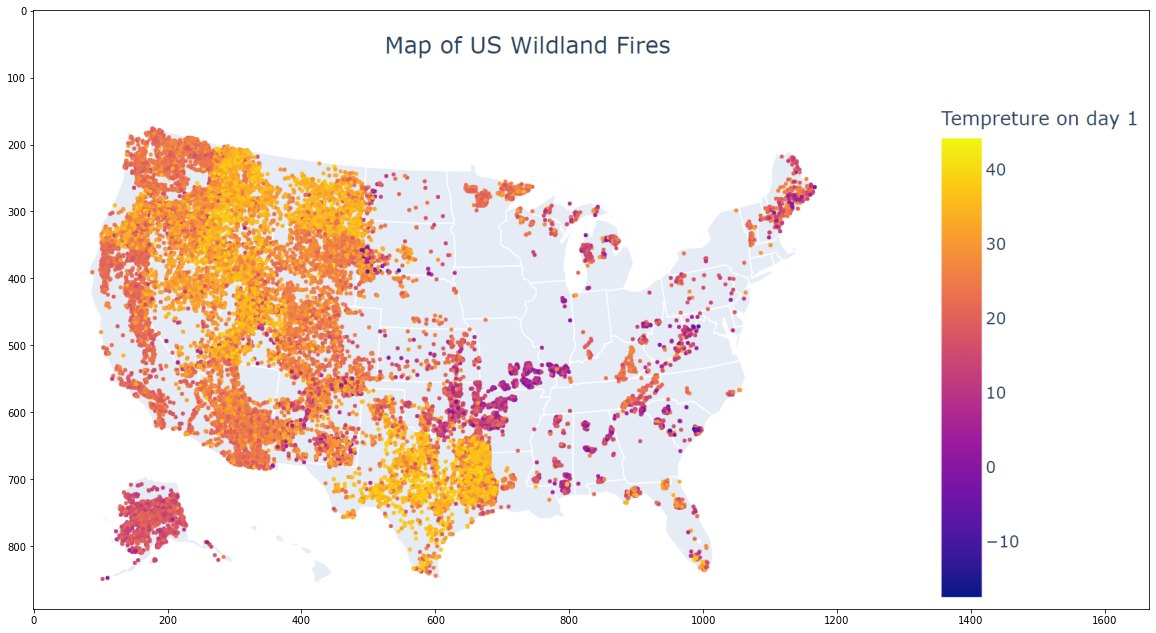

In [35]:
img = cv2.imread("Map_Of_Fire_Locations_With_Temp.png")
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.imshow(img[:,:,::-1])
ax.set_aspect(1)

## Outliers

In [36]:
# show world map with lat/long
# show violin / IQR of acres